In [271]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [272]:
df = pd.read_csv('Train.csv')
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [273]:
df.shape

(8523, 12)

In [274]:
# statistical info
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [275]:
# datatype of attributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [276]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [277]:
ca_col =[]
for x in df.dtypes.index:
    if df.dtypes[x] == 'object':
        ca_col.append(x)

ca_col   

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [278]:
for col in ca_col:
    print (col)
    print(df[col].value_counts())
    print("\n---------------------------------------\n")

Item_Identifier
FDW13    10
FDG33    10
FDD38     9
FDX04     9
DRE49     9
         ..
DRF48     1
FDK57     1
FDE52     1
FDC23     1
FDN52     1
Name: Item_Identifier, Length: 1559, dtype: int64

---------------------------------------

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

---------------------------------------

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

---------------------------------------

Outlet_Identifier
OUT0

In [279]:
df['Item_Weight'].mean()

12.857645184136183

# fill the missing values

In [280]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [281]:
for i , item_id in enumerate (df["Item_Identifier"]):
    if np.isnan(df.loc[i,"Item_Weight"]):
        df['Item_Weight'][i] = df['Item_Weight'].mean()
    

In [282]:
df['Item_Weight'].mean()

12.857645184136409

In [283]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [284]:
outlet_size_mode = df.pivot_table(values ='Outlet_Size' , columns ='Outlet_Type' , aggfunc= lambda x : x.mode()[0] )
outlet_size_mode

Outlet_Type,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
Outlet_Size,Small,Small,Medium,Medium


In [285]:
df[df["Outlet_Size"].isna()].head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.2,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.2,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.2,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [286]:
missing = df['Outlet_Size'].isnull()
missing

0       False
1       False
2       False
3        True
4       False
        ...  
8518    False
8519     True
8520    False
8521    False
8522    False
Name: Outlet_Size, Length: 8523, dtype: bool

In [287]:
df.loc[missing, 'Outlet_Size'] = df.loc[missing, 'Outlet_Type'].apply(lambda x: outlet_size_mode[x])

In [288]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [289]:
df.loc[:, 'Item_Visibility'].replace([0.0], [df['Item_Visibility'].mean()], inplace=True)


In [290]:
(df['Item_Visibility']==0).any()

False

In [291]:
0
# combine item fat content
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat', 'reg':'Regular', 'low fat':'Low Fat'})
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [292]:
df['Item_Identifier'] = df['Item_Identifier'].apply(lambda x : x[:2])

In [293]:
df['Item_Identifier'].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

In [294]:
# create small values for establishment year
df['Outlet_Establishment_Year'] = 2013 - df['Outlet_Establishment_Year']

In [295]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,2097.2700


# Exploratory Data Analysis


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

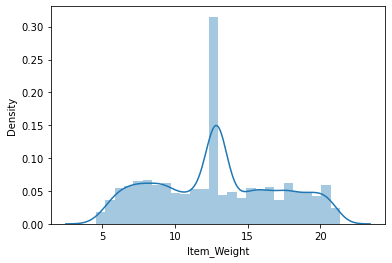

In [296]:
sns.distplot(df["Item_Weight"])

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

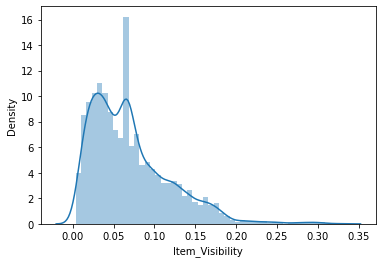

In [297]:
sns.distplot(df['Item_Visibility'])

In [298]:
df['Item_Visibility']=df['Item_Visibility'].apply( lambda x : np.log(x))

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

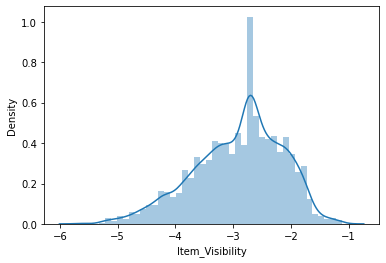

In [299]:
sns.distplot(df['Item_Visibility'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

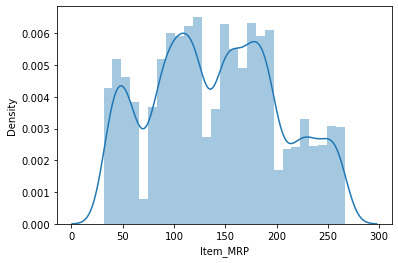

In [300]:
sns.distplot(df['Item_MRP'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

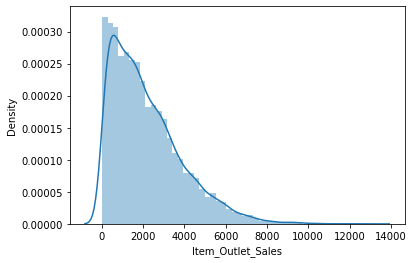

In [301]:
sns.distplot(df['Item_Outlet_Sales'])

In [302]:
# log transformation
df['Item_Outlet_Sales'] = np.log(1+df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

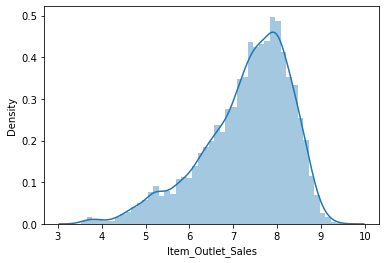

In [303]:
sns.distplot(df['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

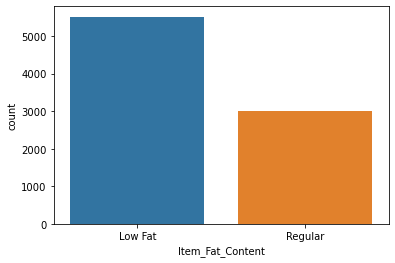

In [304]:
sns.countplot(df["Item_Fat_Content"])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

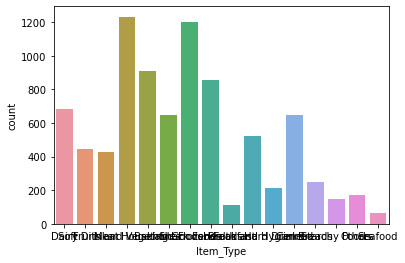

In [305]:
sns.countplot(df['Item_Type'])

[Text(0, 0, 'Dairy'),
 Text(1, 0, 'Soft Drinks'),
 Text(2, 0, 'Meat'),
 Text(3, 0, 'Fruits and Vegetables'),
 Text(4, 0, 'Household'),
 Text(5, 0, 'Baking Goods'),
 Text(6, 0, 'Snack Foods'),
 Text(7, 0, 'Frozen Foods'),
 Text(8, 0, 'Breakfast'),
 Text(9, 0, 'Health and Hygiene'),
 Text(10, 0, 'Hard Drinks'),
 Text(11, 0, 'Canned'),
 Text(12, 0, 'Breads'),
 Text(13, 0, 'Starchy Foods'),
 Text(14, 0, 'Others'),
 Text(15, 0, 'Seafood')]

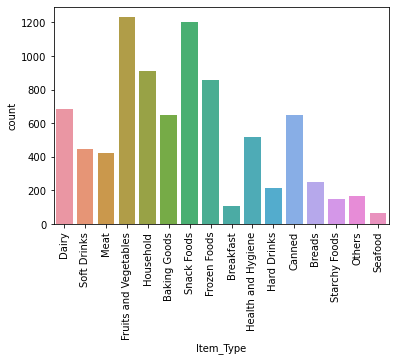

In [306]:
# plt.figure(figsize=(15,5))
l = list(df['Item_Type'].unique())
chart = sns.countplot(df['Item_Type'])
chart.set_xticklabels(labels=l, rotation=90)

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='count'>

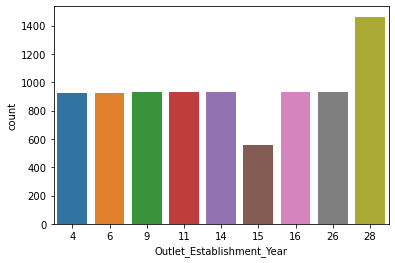

In [307]:
sns.countplot(df['Outlet_Establishment_Year'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

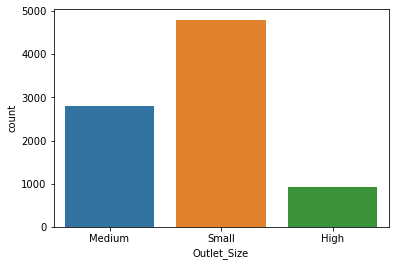

In [308]:
sns.countplot(df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

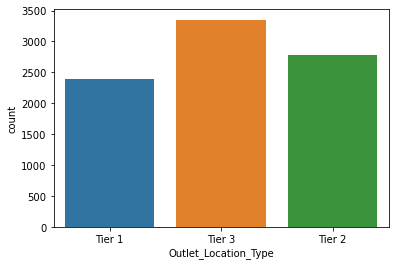

In [309]:
sns.countplot(df['Outlet_Location_Type'])


<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

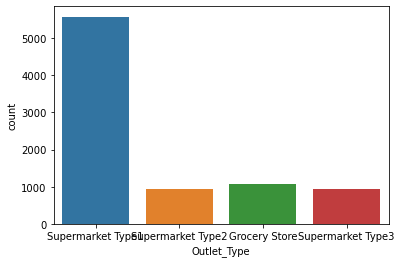

In [310]:
sns.countplot(df['Outlet_Type'])


<AxesSubplot:>

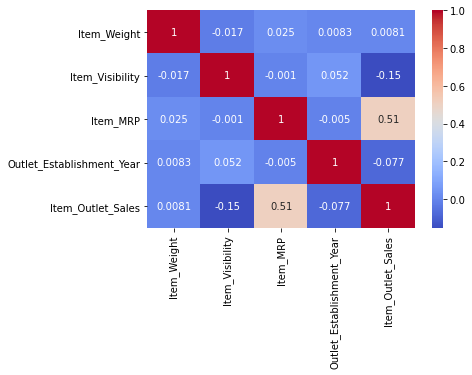

In [311]:
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [312]:
df.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.30,Low Fat,-4.132215,Dairy,249.8092,OUT049,14,Medium,Tier 1,Supermarket Type1,8.225808
1,DR,5.92,Regular,-3.948780,Soft Drinks,48.2692,OUT018,4,Medium,Tier 3,Supermarket Type2,6.096776
2,FD,17.50,Low Fat,-4.088756,Meat,141.6180,OUT049,14,Medium,Tier 1,Supermarket Type1,7.648868


# Label Encoding

In [313]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat = [ 'Outlet_Size']
for col in cat:
    df[col] = le.fit_transform(df[col])

# Onehot Encoding

In [314]:
for c in ['Outlet_Identifier','Outlet_Size']:
    ca_col.remove(c)

In [315]:
ca_col

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Location_Type',
 'Outlet_Type']

In [316]:
df=df.drop("Outlet_Identifier",axis=1)

In [317]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

columnTransformer = ColumnTransformer([('encoder', OneHotEncoder(drop='first'), ca_col)], remainder='passthrough')
data = columnTransformer.fit_transform(df)
column_name = columnTransformer.get_feature_names()
data1 =  pd.DataFrame(data, columns= column_name)
data1.head(2)

,encoder__x0_FD,encoder__x0_NC,encoder__x1_Regular,encoder__x2_Breads,encoder__x2_Breakfast,encoder__x2_Canned,encoder__x2_Dairy,encoder__x2_Frozen Foods,encoder__x2_Fruits and Vegetables,encoder__x2_Hard Drinks,...,encoder__x3_Tier 3,encoder__x4_Supermarket Type1,encoder__x4_Supermarket Type2,encoder__x4_Supermarket Type3,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Item_Outlet_Sales
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,9.30,-4.132215,249.8092,14.0,1.0,8.225808
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,5.92,-3.948780,48.2692,4.0,1.0,6.096776


In [318]:
df1=data1.copy()

In [319]:
y = df1["Item_Outlet_Sales"]
x=df1.drop("Item_Outlet_Sales",axis=1)